In [1]:
from Bezier_curve_generation import bezier_fit, is_close_to_linev2, train, BezierCoeff
import numpy as np

In [2]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import os
img_id = '2'
img_path = f'datasets/ic15/test_images/img_{img_id}.jpg'
img_pil = img = Image.open(img_path)
pts = [790.0, 302.0, 903.0, 304.0, 902.0, 335.0, 790.0, 335.0]

0.0 1468
0.0 1468


(-0.5, 1279.5, 719.5, -0.5)

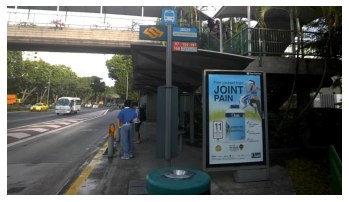

In [3]:
xy_coords = np.array(pts)
lh = len(xy_coords)
assert(lh % 4 ==0)
lhc2 = int(lh/2)
lhc4 = int(lh/4)
xcors = [xy_coords[i] for i in range(0, len(xy_coords),2)]
ycors = [xy_coords[i+1] for i in range(0, len(xy_coords),2)]

curve_data_top = xy_coords[0:lhc2].reshape(lhc4, 2)
curve_data_bottom = xy_coords[lhc2:].reshape(lhc4, 2)

left_vertex_x = [curve_data_top[0,0], curve_data_bottom[lhc4-1,0]]
left_vertex_y = [curve_data_top[0,1], curve_data_bottom[lhc4-1,1]]
right_vertex_x = [curve_data_top[lhc4-1,0], curve_data_bottom[0,0]]
right_vertex_y = [curve_data_top[lhc4-1,1], curve_data_bottom[0,1]]

x_data = curve_data_top[:, 0]
y_data = curve_data_top[:, 1]

init_control_points = bezier_fit(x_data, y_data)
size_ = img.size[0]**2 + img.size[1]**2
learning_rate = is_close_to_linev2(x_data, y_data, size_)

x0, x1, x2, x3, y0, y1, y2, y3 = train(x_data, y_data, init_control_points, 0.0)
control_points = np.array([
        [x0,y0],\
        [x1,y1],\
        [x2,y2],\
        [x3,y3]                        
])

x_data_b = curve_data_bottom[:, 0]
y_data_b = curve_data_bottom[:, 1]

init_control_points_b = bezier_fit(x_data_b, y_data_b)
learning_rate = is_close_to_linev2(x_data_b, y_data_b, size_)

x0_b, x1_b, x2_b, x3_b, y0_b, y1_b, y2_b, y3_b = train(x_data_b, y_data_b, init_control_points_b, 0.0)
control_points_b = np.array([
        [x0_b,y0_b],\
        [x1_b,y1_b],\
        [x2_b,y2_b],\
        [x3_b,y3_b]                        
])

t_plot = np.linspace(0, 1, 81)
Bezier_top = np.array(BezierCoeff(t_plot)).dot(control_points)

Bezier_bottom = np.array(BezierCoeff(t_plot)).dot(control_points_b)

# fig, ax = plt.subplots()
# plt.plot(x_data, y_data,    'ro', label='input', linewidth = 1.0)
# plt.plot(x_data_b, y_data_b,    'ro', label='input', linewidth = 1.0)

# plt.plot(Bezier_top[:,0],
#         Bezier_top[:,1],         'g-', label='fit', linewidth=1.0)
# plt.plot(Bezier_bottom[:,0],
#         Bezier_bottom[:,1],         'g-', label='fit', linewidth=1.0)        
# plt.plot(control_points[:,0],
#         control_points[:,1], 'r.:', fillstyle='none', linewidth=1.0)
# plt.plot(control_points_b[:,0],
#         control_points_b[:,1], 'r.:', fillstyle='none', linewidth=1.0)

# plt.plot(left_vertex_x, left_vertex_y, 'g-', linewidth=1.0)
# plt.plot(right_vertex_x, right_vertex_y, 'g-', linewidth=1.0)

# outstr = '{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{}||||{}\n'.format(x0,y0,\
#                                                                     round(x1, 2), round(y1, 2),\
#                                                                     round(x2, 2), round(y2, 2),\
#                                                                     round(x3, 2), round(y3, 2),\
#                                                                     round(x0_b, 2), round(y0_b, 2),\
#                                                                     round(x1_b, 2), round(y1_b, 2),\
#                                                                     round(x2_b, 2), round(y2_b, 2),\
#                                                                     round(x3_b, 2), round(y3_b, 2),\
#                                                                     cts[iid])
# outgt.writelines(outstr)
# outgt.close()

plt.imshow(img)
plt.axis('off')

# if not os.path.isdir('vis_results'):
#     os.mkdir('vis_results')
# plt.savefig('vis_results/'+os.path.basename(imgdir), bbox_inches='tight',dpi=400)
# plt.clf()

In [4]:
control_points

array([[790., 302.],
       [  0.,   0.],
       [  0.,   0.],
       [903., 304.]])

In [5]:
control_points_b

array([[902., 335.],
       [  0.,   0.],
       [  0.,   0.],
       [790., 335.]])

In [6]:
# draw = ImageDraw.Draw(img_pil)
# draw.polygon(points, outline="red")
# w, h = img_pil.size
# dpi = 100
# fig_width = w / dpi
# fig_height = h / dpi
# plt.figure(figsize=(fig_width, fig_height), dpi=dpi)

# # Show the image using Matplotlib
# plt.imshow(img_pil)
# plt.axis('off') # Optional, to hide the axis
# plt.show()